**Neta Thee 212365555**

**Part 1**

**Q1**

**A)**
Covariance an correlation are both a measure of the connection between two random variables.
Covariance show how thw two variables depend on each other while correlation show how they relate.
Furthermore, correlation shows not only the direction of the relationship (like covariance), but also the strength of the relation.

$$
CoV(X,Y) = \frac{Σ(Xᵢ-X̄)(Yⱼ-Ȳ)}{n}
$$

$$
r = \frac{CoV(X,Y)}{σ _x σ _y}
$$





**B)**
* Load the Iris dataset.
* Visualization to explore the relationship between the different features.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris_df = sns.load_dataset("iris")

# Describe the dataset to have a vision of what's in the dataset
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
# Learn the type of each column
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

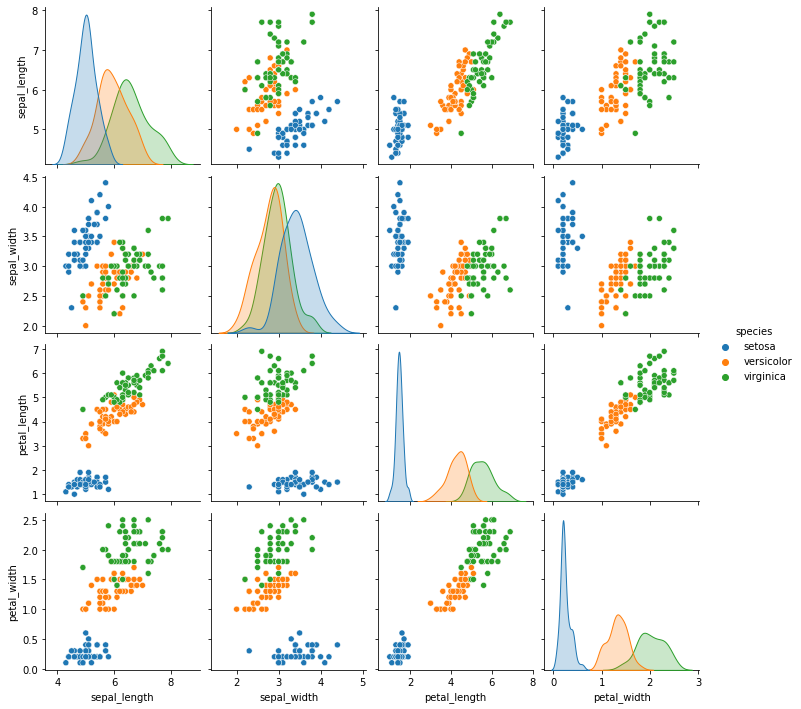

In [24]:
# Visulaize the dataset using pairplot (colors by species) to get a better vision of the relations in the data.
iris_df.species.value_counts()
sns.pairplot(iris_df, hue="species")

**C)** Implement the following functions:

**a.** A function to calculate the covariance between two variables

A reminder:

$$
CoV(X,Y) = \frac{Σ(Xᵢ-X̄)(Yⱼ-Ȳ)}{n}
$$


In [25]:
# Create a Covariance function
def calcCov(x, y):
  # Initialaize a sum varable
  sum = 0
  # A loop, for every index- claculate the differnece between Xi and the mean of x times Yi and the mean of y
  for i in range(len(x)):
    # Add the result of the multiplication to the sum variable
    sum += (x[i] - x.mean()) * (y[i] - y.mean())
  # Calculate the covariance by the total sum devided by n
  cov = sum / (len(x) - 1)
  # Return the covariance value between two variables
  return cov

# Example of a use to the function:
# Calculate the covariance between sepal_length and sepal_width
cov_len_wid = calcCov(iris_df.sepal_length, iris_df.sepal_width)
print(cov_len_wid)

-0.04243400447427291


**b.** A function to compute the Covariance matrix

In [26]:
import pandas as pd

# Create a function that outpus covariance matrix
def covMat(data):
  # Initialaize a matrix
  matrix = [[0.0 for _ in range(len(data.columns)-1)] for _ in range(len(data.columns)-1)]
  # A loop, run over the numerical columns (I know its [:-1] because I checked with df.dtypes)
  for i in range(len(data.columns)-1):
    for j in range(len(data.columns)-1):
      # Create x and y to check covariance
      x = data.iloc[:, i]
      y = data.iloc[:, j]
      # Add the covariance to the appropriate position in the matrix
      matrix[i][j] = calcCov(x, y)
    # Define the columns and index of the covmat by the shape of the df without the non numerical columns
    column_names = data.columns[:-1]
  # Return a dataframe (table) of the matrix
  return pd.DataFrame(matrix, columns=column_names, index=column_names)

covmat = covMat(iris_df)
print(covmat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006


**D)** Test1

* **a.** Using np.cov I got a marix of 2X2.

  The diagonal shows the variance of each variable alone. Off-diagonal shows the covariance.

 * *The covariance using np.cov is the same as the coveriance using calcCov.*

* **b.** Using np.cov I got a 4x4 matrix of covariance.

  * *The covariance matrix using np.cov is the same as the coveriance using covMat.*

Test1 <font color="green"> ☑ </font>



In [27]:
import numpy as np

# a) Test calcCov, using np.cov with the variables sepal length and sepal width
cov_test= np.cov(iris_df.sepal_length, iris_df.sepal_width, rowvar = False)
print(cov_test)

# b) Test covMat, using np.cov over iris_df
# Because there is a column of object ('species') I need to adress only the numerical columns
numiris_df = iris_df.select_dtypes(include=np.number)
covmat_test = np.cov(numiris_df, rowvar = False)
print(covmat_test)

[[ 0.68569351 -0.042434  ]
 [-0.042434    0.18997942]]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


**E)** Using the covariance function, implement a function to calculate the correlation matrix

A reminder:
$$
r = \frac{CoV(X,Y)}{σ _x σ _y}
$$

In [28]:
# Create a function that returns a correlation matrix
def corrMat(data):
  matrix = [[0.0 for _ in range(len(data.columns)-1)] for _ in range(len(data.columns)-1)]
  # A loop, run over the numerical columns (I know its [:-1] because I checked with df.dtypes)
  for i in range(len(data.columns)-1):
    for j in range(len(data.columns)-1):
      # Create x and y to check correlation
      x = data.iloc[:, i]
      y = data.iloc[:, j]
      column_names = data.columns[:-1]
      # change the value to the correlation in the appropriate position in the matrix
      matrix[i][j] = (covMat(data).loc[column_names[i], column_names[j]]) / (x.std() * y.std())
  # Return a dataframe (table) of the matrix
  return pd.DataFrame(matrix, columns=column_names, index=column_names)

corrmat = corrMat(iris_df)
print(corrmat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


**F)** Test2

* Using np.corrcoef I got a marix of 4x4.

 * *The correlation using np.corrcoef is the same as the correlation matrix using corrMat
 .*

Test2 <font color="green"> ☑ </font>



In [29]:
# Because there is a column of object ('species') I need to adress only the numerical columns
# I will use the data numiris_df, a variable created in section D.b.
corrmat_test = np.corrcoef(numiris_df, rowvar = False)
print(corrmat_test)


[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


**G)** Visualizations of:
* Covariance matrix
* Correlation matrix

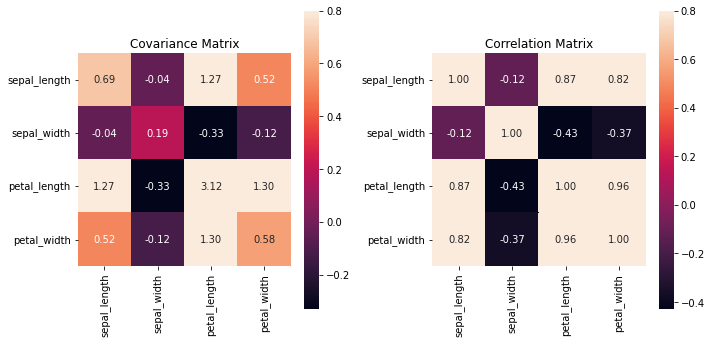

In [30]:
# Create a figure of two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a dictionary, key = title, value = variable to plot
matrices = {'Covariance': covmat, 'Correlation': corrmat}
# A loop to run over the dictionary and plot as heatmap both variables
for i, (title, matrix) in enumerate(matrices.items()):
    sns.heatmap(matrix, vmax=.8, square=True, annot=True, fmt='.2f',
                annot_kws={'size': 10}, ax=axes[i])
    axes[i].set_title(f'{title} Matrix')

plt.tight_layout()
plt.show()

**Part 2**

**Q2**

In [31]:
# Import all nessecary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# import the data
laptop_price = 'C:\projectsadna\mini_project1\miniproject1\laptop_price - dataset.csv'
laptop_df = pd.read_csv(laptop_price)

# decribe the dataset
laptop_df.describe()


,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [32]:
# print first 5 rows of the data
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


**a)** Plot the price of all the laptops

Text(0, 0.5, 'Frequency')

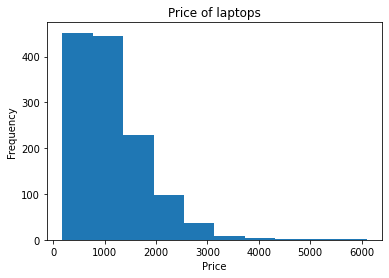

In [33]:
# Plot a histogram of all laptops price, x axes is the price and y axes is the frequency of that price
plt.hist(laptop_df['Price (Euro)'])
plt.title("Price of laptops")
plt.xlabel("Price")
plt.ylabel("Frequency")

:**b)** Which company has on average the most expensive laptop? What is the average laptop price for each company?

{'Apple': 1564.1985714285713, 'HP': 1080.3146641791045, 'Acer': 633.4644554455446, 'Asus': 1123.8297368421051, 'Dell': 1199.2251202749142, 'Lenovo': 1093.8622145328723, 'Chuwi': 314.2966666666667, 'MSI': 1728.9081481481483, 'Microsoft': 1612.3083333333334, 'Toshiba': 1267.8125, 'Huawei': 1424.0, 'Xiaomi': 1133.4625, 'Vero': 217.425, 'Razer': 3346.1428571428573, 'Mediacom': 295.0, 'Samsung': 1413.4444444444443, 'Google': 1677.6666666666667, 'Fujitsu': 729.0, 'LG': 2099.0}
Razer has on average the most expensive laptop with an average of: 3346.1428571428573


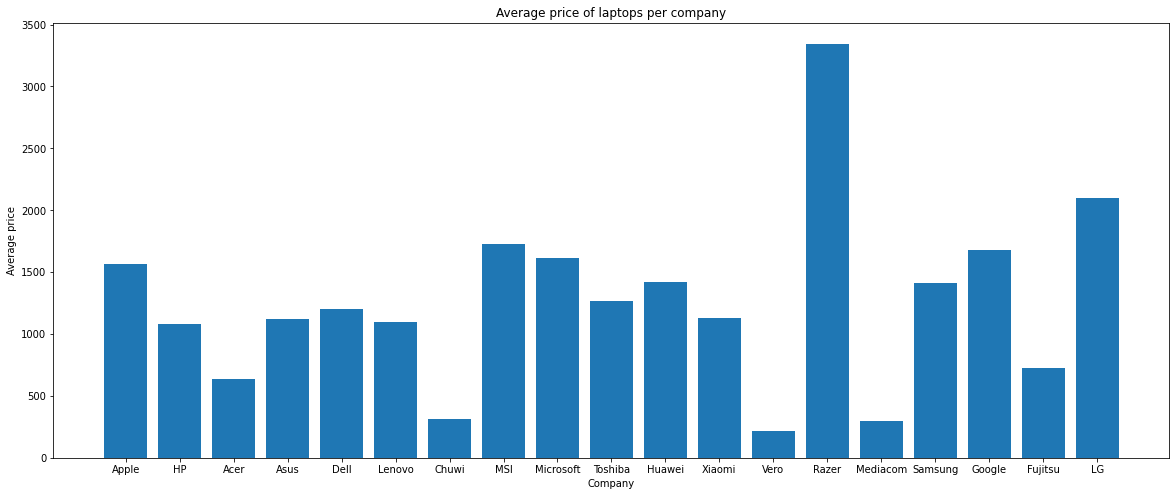

In [34]:
# Create a list of all companies
company = list(laptop_df['Company'].unique())

# Create a dictionary where the key is the company name and the value is the mean proce for that company
dict_avg = {}
for i in company:
  company_df = laptop_df.loc[laptop_df['Company'] == i]
  dict_avg[i] = company_df['Price (Euro)'].mean()

print(dict_avg)

# Plot the averages
plt.figure(figsize=(20, 8))
plt.bar(dict_avg.keys(), dict_avg.values())
plt.title("Average price of laptops per company")
plt.xlabel("Company")
plt.ylabel("Average price")

# Find the comapny with the highest average and what it is
max_avg = max(dict_avg.values())
max_company = max(dict_avg, key=dict_avg.get)
print(max_company, "has on average the most expensive laptop with an average of:", max_avg)

**c)** Find the different types of operating systems present in the data - under the column name "OpSys"
* Please note,there are operating systems that are the same systems and just written differently in the column. please fix them to be uniform.

In [35]:
# Identifying the different operating systems
print("Old OpSys:", laptop_df['OpSys'].unique())

# All mac operating systems will be 'mac' and all windows operating systems will be 'windows'
new_df = laptop_df.replace(['macOS', 'Mac OS X', 'Windows 10', 'Windows 10 S', 'Windows 7', 'No OS', 'Chrome OS'], ['Mac', 'Mac', 'Windows', 'Windows', 'Windows', 'None', 'Chrome' ])

# Identifying the operating systems after the change
print("\nNew OpSys:", new_df['OpSys'].unique())


Old OpSys: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

New OpSys: ['Mac' 'None' 'Windows' 'Linux' 'Android' 'Chrome']


**d)** Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of of unique operating systems.


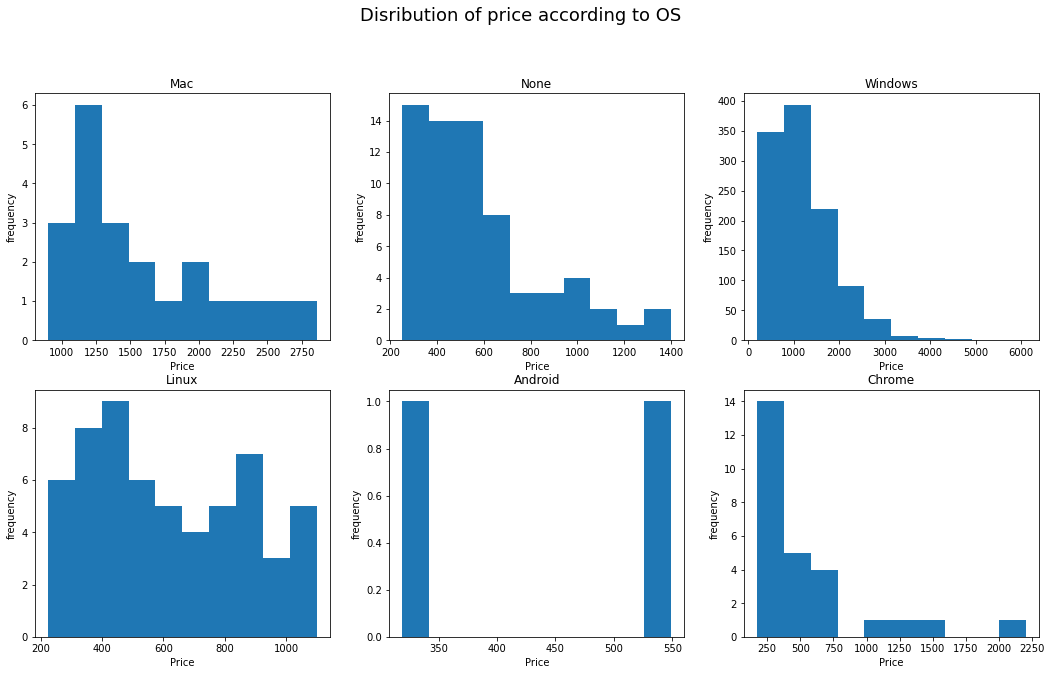

In [36]:
# Create a figure
fig, axs = plt.subplots(2,3 , figsize=(18,10))
fig.suptitle('Disribution of price according to OS', x=0.5, y=1, fontsize=18)
# For each OS plot a histogram of prices
for i, os in enumerate(new_df['OpSys'].unique()):
  plt.subplot(2,3, i+1)
  plt.hist(new_df.loc[new_df['OpSys'] == os]['Price (Euro)'])
  plt.title(os)
  plt.xlabel("Price")
  plt.ylabel("frequency")


**e)** What is the relationship between RAM and computer price? add an adequent plot to support your findings.



The correlation between RAM and computer price is: 0.7402865271622703


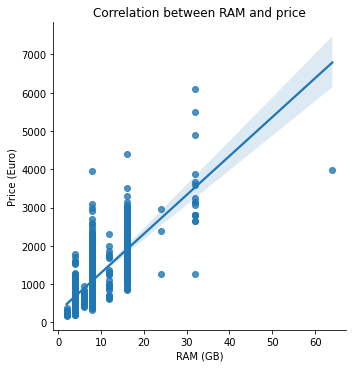

In [37]:
ram = laptop_df['RAM (GB)']
price = laptop_df['Price (Euro)']

corr = ram.corr(price)
print("The correlation between RAM and computer price is:", corr)

sns.lmplot(x="RAM (GB)", y="Price (Euro)", data=laptop_df)
plt.title("Correlation between RAM and price")
plt.show()

**f)** create a new column for the dataframe called "storage type" that extract the storage type from the column "memory"

* for example, in the first row in the column "memory" it states "128 SSD", the new column will have just "SSD" in the first row.

In [38]:
# Create to column, values are extracted from memory.

# Create a new column called "storage type" by extracting all storage types from the "Memory" column
laptop_df['storage type'] = laptop_df['Memory'].str.findall(r'(\bSSD|\bHDD|\bFlash Storage|\bHybrid|\beMMC\b)')

# Remove duplicates from the list of storage types for each row
laptop_df['storage type'] = laptop_df['storage type'].apply(lambda x: ' + '.join(list(dict.fromkeys(x))))

# Print head to see if the result is what I wanted
laptop_df.head()
laptop_df['storage type'].unique()


array(['SSD', 'Flash Storage', 'HDD', 'SSD + HDD', 'Hybrid',
       'Flash Storage + HDD', 'SSD + Hybrid'], dtype=object)

**Q3**

Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them?

Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

Additional questions:

1. Does it effect the price if GPU company and CPU company for the same computer are not the same one?
2. What is the avarage size of computer for each company?
3. What is the correlation between RAM and CPU Type?
4. Which CPU Company has the most expensive computer on average?

**Which CPU Company has the most expensive computer on average?**

In [39]:
# Create a list of all cpu companies
cpu = list(laptop_df['CPU_Company'].unique())

# Create a dictionary where the key is the company name and the value is the mean proce for that company
dictcpu_avg = {}
for i in cpu:
  cpu_df = laptop_df.loc[laptop_df['CPU_Company'] == i]
  dictcpu_avg[i] = cpu_df['Price (Euro)'].mean()

# Find the comapny with the highest average and what it is
max_avgcpu = max(dictcpu_avg.values())
max_cpu = max(dictcpu_avg, key=dictcpu_avg.get)
print(max_cpu, "has on average the most expensive laptop with an average of:", max_avgcpu)

Intel has on average the most expensive laptop with an average of: 1163.7289291598022


**Does it effect the price if GPU company and CPU company for the same computer are not the same one?**

CPU: ['Intel', 'AMD', 'Samsung']
GPU: ['Intel', 'AMD', 'Nvidia', 'ARM']


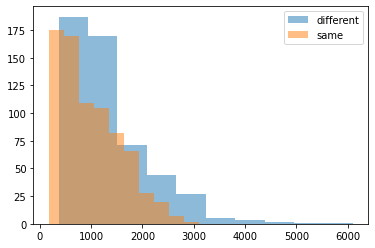

Average price when the same comapny provide CPU is GPU: 984.2912303664922
Average price when different comapnies provide CPU is GPU: 1360.2486301369863
Average price without 0.1 of outliers: 
Same company: 925.5420098039215 
Different company 1246.121149144254


In [40]:
# Print the different CPU and GPU companies
print("CPU:", list(laptop_df['CPU_Company'].unique()))
print("GPU:", list(laptop_df['GPU_Company'].unique()))

# Create a list of prices for the group that have the same company for CPU and GPU, and a list for the group that have differeny companies CPU and GPU
price_diff = []
price_same = []
# Loop over all the rows
for i in laptop_df.index:
  # Check if the CPU and GPU companies are not the same, add them to the diff list
  if laptop_df.loc[i, "CPU_Company"] != laptop_df.loc[i, "GPU_Company"]:
    price_diff.append(laptop_df.loc[i, "Price (Euro)"])
  # If there not different, add them to the same list
  else:
    price_same.append(laptop_df.loc[i, "Price (Euro)"])

# Visulaize the prices for each group
plt.hist(price_diff, alpha=0.5, label='different')
plt.hist(price_same, alpha=0.5, label='same')
plt.legend(loc='upper right')
plt.show()

# Finding the avarage price for each group
print("Average price when the same comapny provide CPU is GPU:", np.mean(price_same))
print("Average price when different comapnies provide CPU is GPU:", np.mean(price_diff))

# Since I saw in the visualization that there are a few outliers, I wanted to know if when the CPU and GPU companies are the same the average price is still lower than when they are different
print("Average price without 0.1 of outliers: \nSame company:", scipy.stats.trim_mean(price_same, 0.1), "\nDifferent company", scipy.stats.trim_mean(price_diff, 0.1))

